<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/Sampling_and_Handling_Imbalance_in_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("clean_cervical.csv")

In [ ]:
df.shape

(858, 33)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,Cancer
0,18,4,15,1,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,34,1,15,1,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


# Normalization

In [ ]:
X = df.drop('Cancer',axis=1) # Features / known variables / X
Y = df['Cancer'] # Target / unknown variable  / Y

In [ ]:
from sklearn import preprocessing
x = X.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled_std = standard_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled_std,columns=X.columns)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,-1.038563,0.905429,-0.707799,-0.831711,-0.409081,-0.295999,-0.202021,-1.479727,-0.548529,-0.327256,-0.245209,-0.318453,-0.292857,-0.232495,0.0,-0.068439,-0.229697,-0.146385,-0.034159,-0.034159,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.193344,-0.188669,-0.146385,-0.10296,-0.146385,-0.169638
1,-1.391796,-0.919610,-1.065450,-0.831711,-0.409081,-0.295999,-0.202021,-1.479727,-0.548529,-0.327256,-0.245209,-0.318453,-0.292857,-0.232495,0.0,-0.068439,-0.229697,-0.146385,-0.034159,-0.034159,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.193344,-0.188669,-0.146385,-0.10296,-0.146385,-0.169638
2,0.845342,-0.919610,-0.707799,-0.831711,-0.409081,-0.295999,-0.202021,-1.479727,-0.548529,-0.327256,-0.245209,-0.318453,-0.292857,-0.232495,0.0,-0.068439,-0.229697,-0.146385,-0.034159,-0.034159,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.193344,-0.188669,-0.146385,-0.10296,-0.146385,-0.169638
3,2.964736,1.513776,-0.350148,1.260982,2.444506,8.821219,16.547162,0.675800,0.285780,-0.327256,-0.245209,-0.318453,-0.292857,-0.232495,0.0,-0.068439,-0.229697,-0.146385,-0.034159,-0.034159,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.193344,-0.188669,6.831301,-0.10296,6.831301,-0.169638
4,2.258271,0.297083,1.438107,1.260982,-0.409081,-0.295999,-0.202021,0.675800,3.623015,-0.327256,-0.245209,-0.318453,-0.292857,-0.232495,0.0,-0.068439,-0.229697,-0.146385,-0.034159,-0.034159,-0.034159,0.0,-0.146385,-0.034159,-0.048337,-0.289093,-0.193344,-0.188669,-0.146385,-0.10296,-0.146385,-0.169638


# Check the target distribution

In [ ]:
Y.value_counts()

0    756
1    102
Name: Cancer, dtype: int64

In [ ]:
Y[Y==0].shape[0] / Y.shape[0]

0.8811188811188811

In [ ]:
Y[Y==1].shape[0] / Y.shape[0]

0.11888111888111888

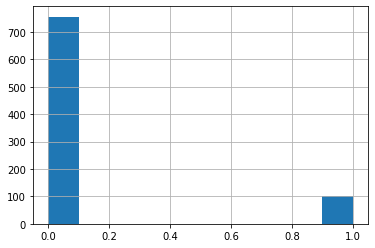

In [ ]:
Y.hist()

### Conclusion ::

There is high imbalance in the target column i..e cancer.

There are 88% healthy patients and 12% cancer patients


# Solution to High Imbalance Problem

## Sampling

#### 1. Under-sampling

#### 2. Over Sampling

Statistical methods of sampling --> univariate and bivariate / multivariate

## 1. Undersampling

The class which has more rows , will be undersampled. And number of rows of large class will be made same as small class

In [ ]:
X.shape,Y.shape

((858, 32), (858,))

In [ ]:
X_0 = X.loc[Y==0]
X_1 = X.loc[Y==1]

In [ ]:
X_0.shape,X_1.shape

((756, 32), (102, 32))

In [ ]:
X_0 = X_0.sample(X_1.shape[0],random_state=7) # random_state is seed 

In [ ]:
X_0.shape,X_1.shape

((102, 32), (102, 32))

In [ ]:
X_bal = pd.concat([X_0,X_1],axis=0)

In [ ]:
X_bal.shape

(204, 32)

In [ ]:
Y_bal = Y.loc[X_bal.index]

In [ ]:
Y_bal.shape

(204,)

In [ ]:
Y_bal.value_counts()

1    102
0    102
Name: Cancer, dtype: int64

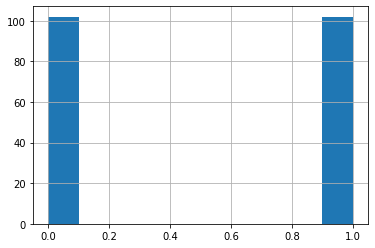

In [ ]:
Y_bal.hist()

# Oversampling

### SMOTE algorithm

Synthetic Minority Oversampling TEchniques

Algorithm:

Select two random samples from minority class. 
Average them to create new sample.

Repeat this multiple times ( as many times required )

Problem:: 

1. This is synthetic data and NOT real data

2. Cannot work on Categorical columns (efficiently)

To install imblearn use::

https://anaconda.org/conda-forge/imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE(random_state=7) #k_neighbours
X_train_res, Y_train_res = sm.fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_res.shape, Y_train_res.shape

((1512, 32), (1512,))

In [ ]:
len(Y_train_res[Y_train_res==0]),len(Y_train_res[Y_train_res==1]) 

(756, 756)